## Project Name: Heart Attack Risk Predictor

### In this project we will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various Algorithms to predict the result and see which one suits best and then we will use Auto ML Library EVAL ML to predict the results.

### We will do the following things:
- Data Analysis 
- Feature Engineering 
- Satandardization
- Model Building
- Predictions

### Let us import the necessary liabraries and read our DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set


In [2]:
import pandas as pd  # Import pandas

# Load the dataset
df = pd.read_csv("/Users/khondokarimtiazahmed/Desktop/Heart Attack prediction ML/heart.csv")

# Display the first few rows to confirm it loaded correctly
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [3]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Data Analysis

### Understanding our DataSet:

#### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.shape

(303, 11)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

#### As we can see there are no null values in our Data Set

In [7]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


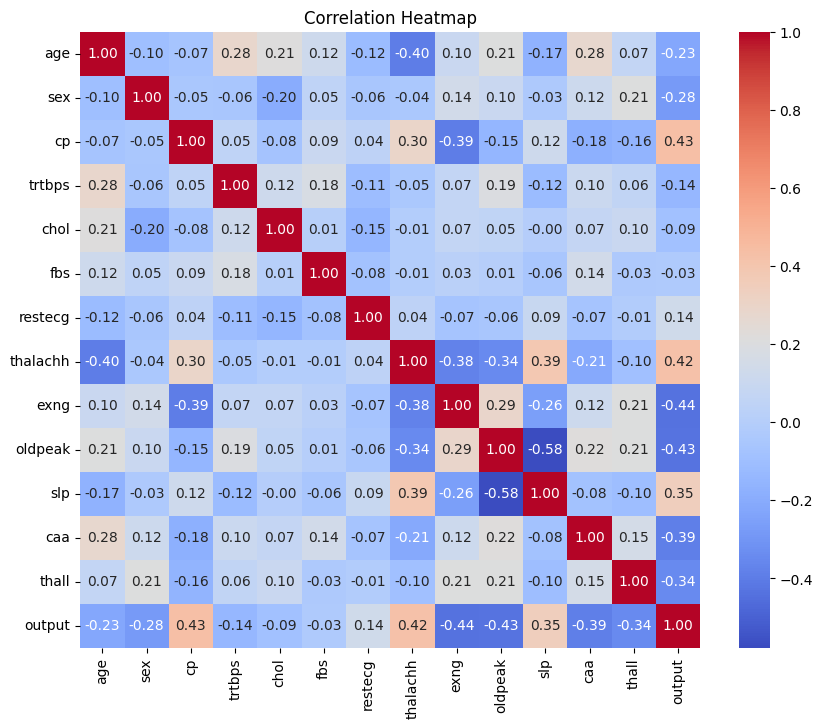

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # Needed for visualization

# Load the dataset
df = pd.read_csv("/Users/khondokarimtiazahmed/Desktop/Heart Attack prediction ML/heart.csv")

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  # Show correlation values
plt.title("Correlation Heatmap")
plt.show()

#### As we can see our variables are not highly correlated to each other 

#### We will do Uni and Bi variate analysis on our Features

<Axes: title={'center': 'Age of Patients'}, xlabel='Age', ylabel='count'>

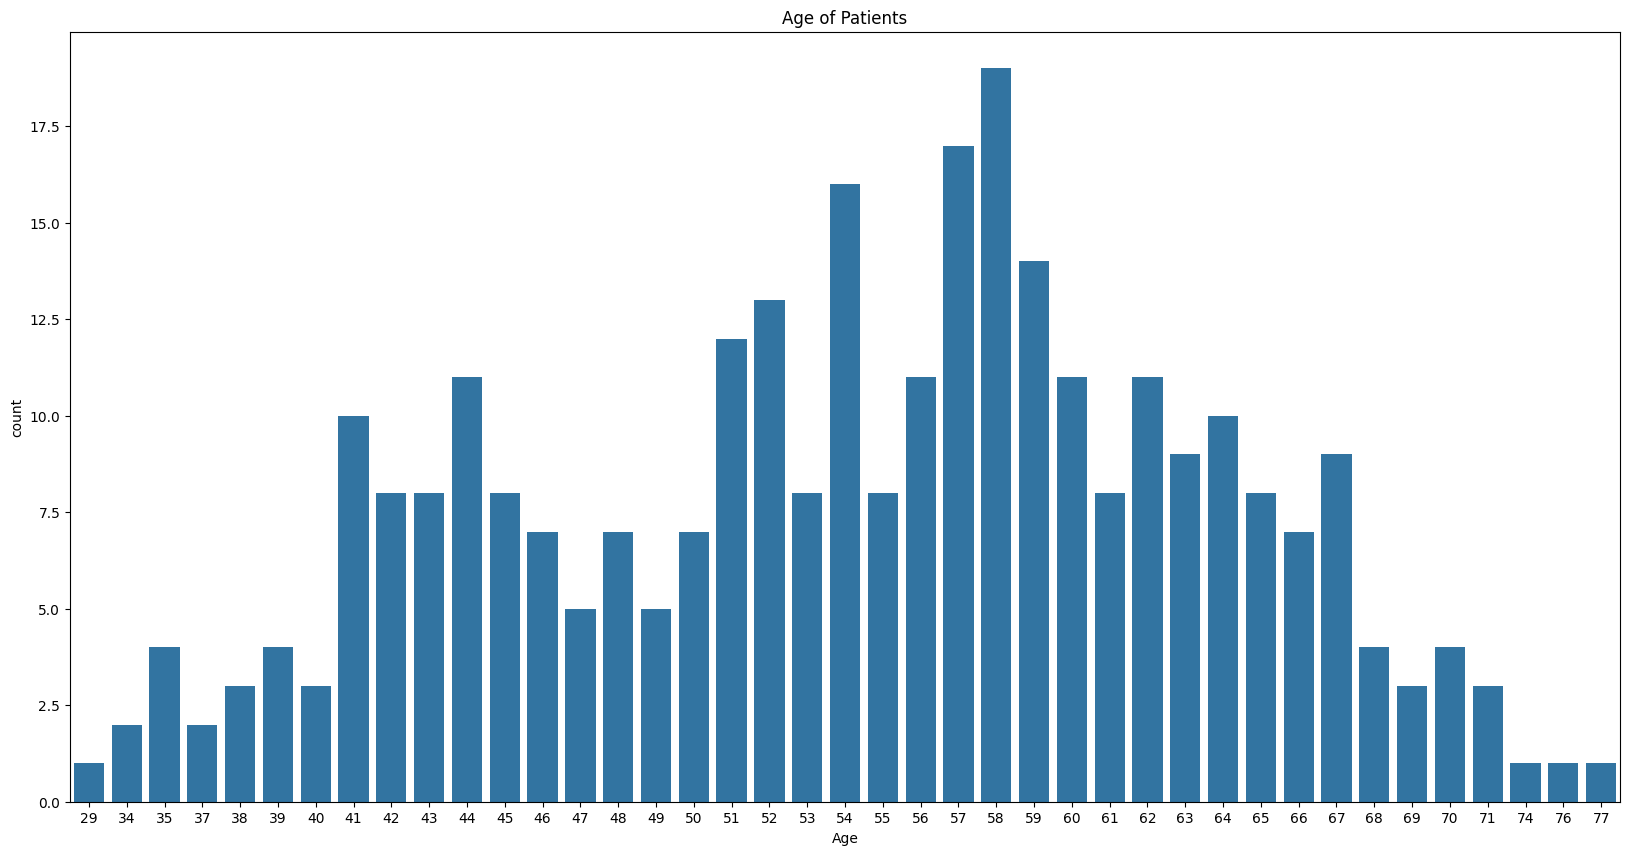

In [9]:

plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

#### As we can see the Patients are of Age Group 51-67years in majority

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

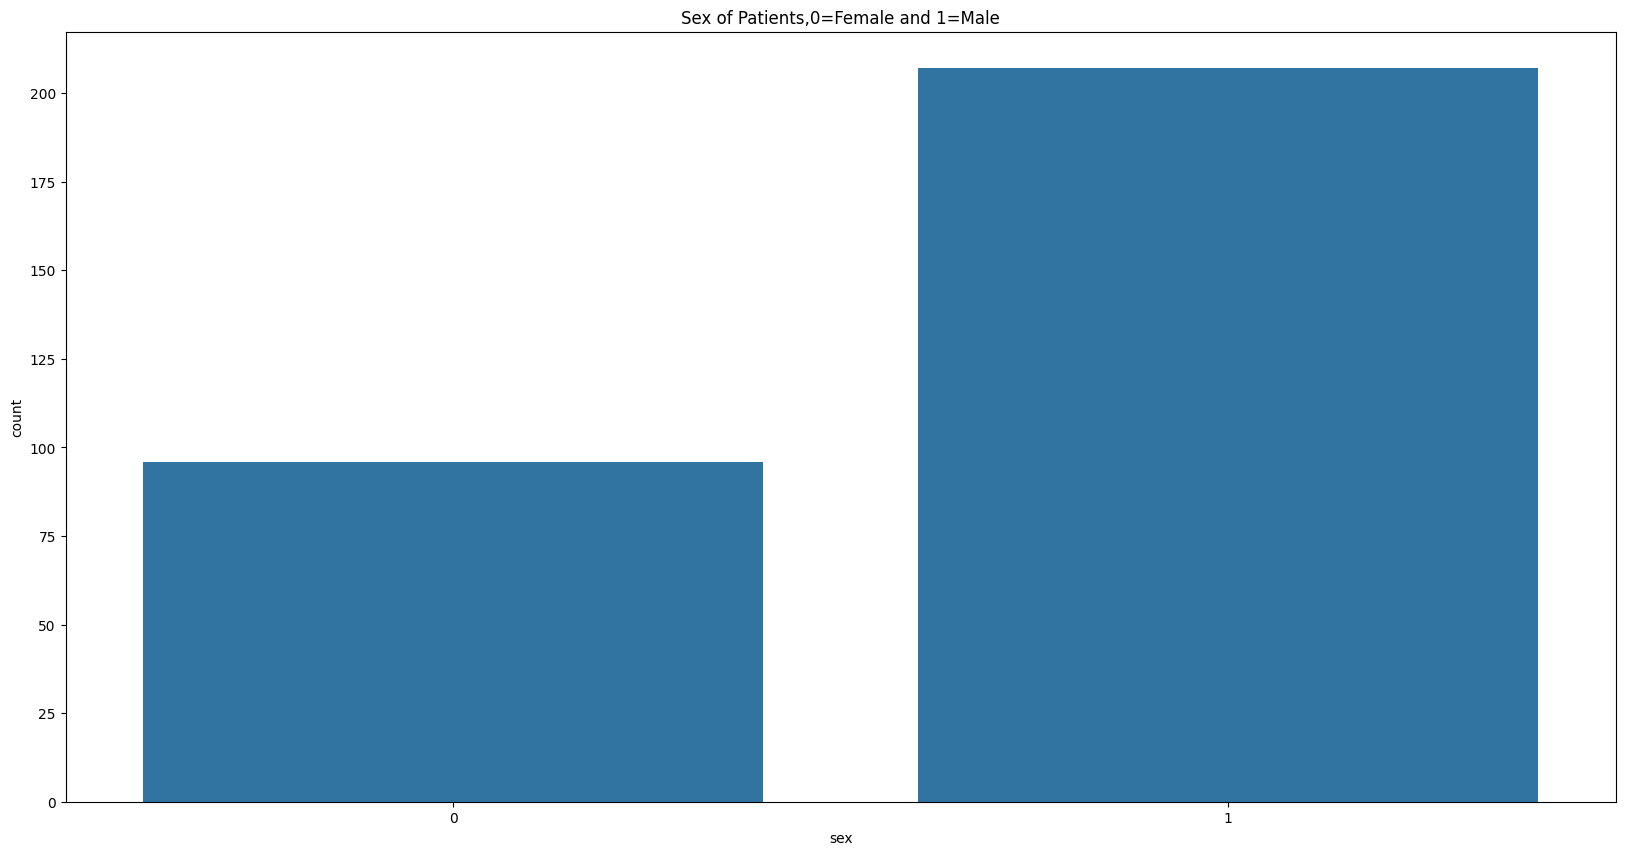

In [10]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df)

In [11]:
import pandas as pd

# Assuming df is already loaded
cp_data = df['cp'].value_counts().reset_index()

# Rename the column properly for clarity
cp_data.columns = ['cp_type', 'count']

# Update values safely using `.loc`
cp_data.loc[3, 'cp_type'] = 'asymptomatic'
cp_data.loc[2, 'cp_type'] = 'non-anginal'
cp_data.loc[1, 'cp_type'] = 'Atypical Angina'  # Fixed spelling
cp_data.loc[0, 'cp_type'] = 'Typical Angina'   # Fixed spelling

# Display updated DataFrame
print(cp_data)

           cp_type  count
0   Typical Angina    143
1  Atypical Angina     87
2      non-anginal     50
3     asymptomatic     23


/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/3596817506.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'asymptomatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cp_data.loc[3, 'cp_type'] = 'asymptomatic'


/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/3617794179.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Asymptomatic' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cp_data.loc[3, 'cp_type'] = 'Asymptomatic'
/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/3617794179.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cp_data['cp_type'], y=cp_data['count'], palette="coolwarm")


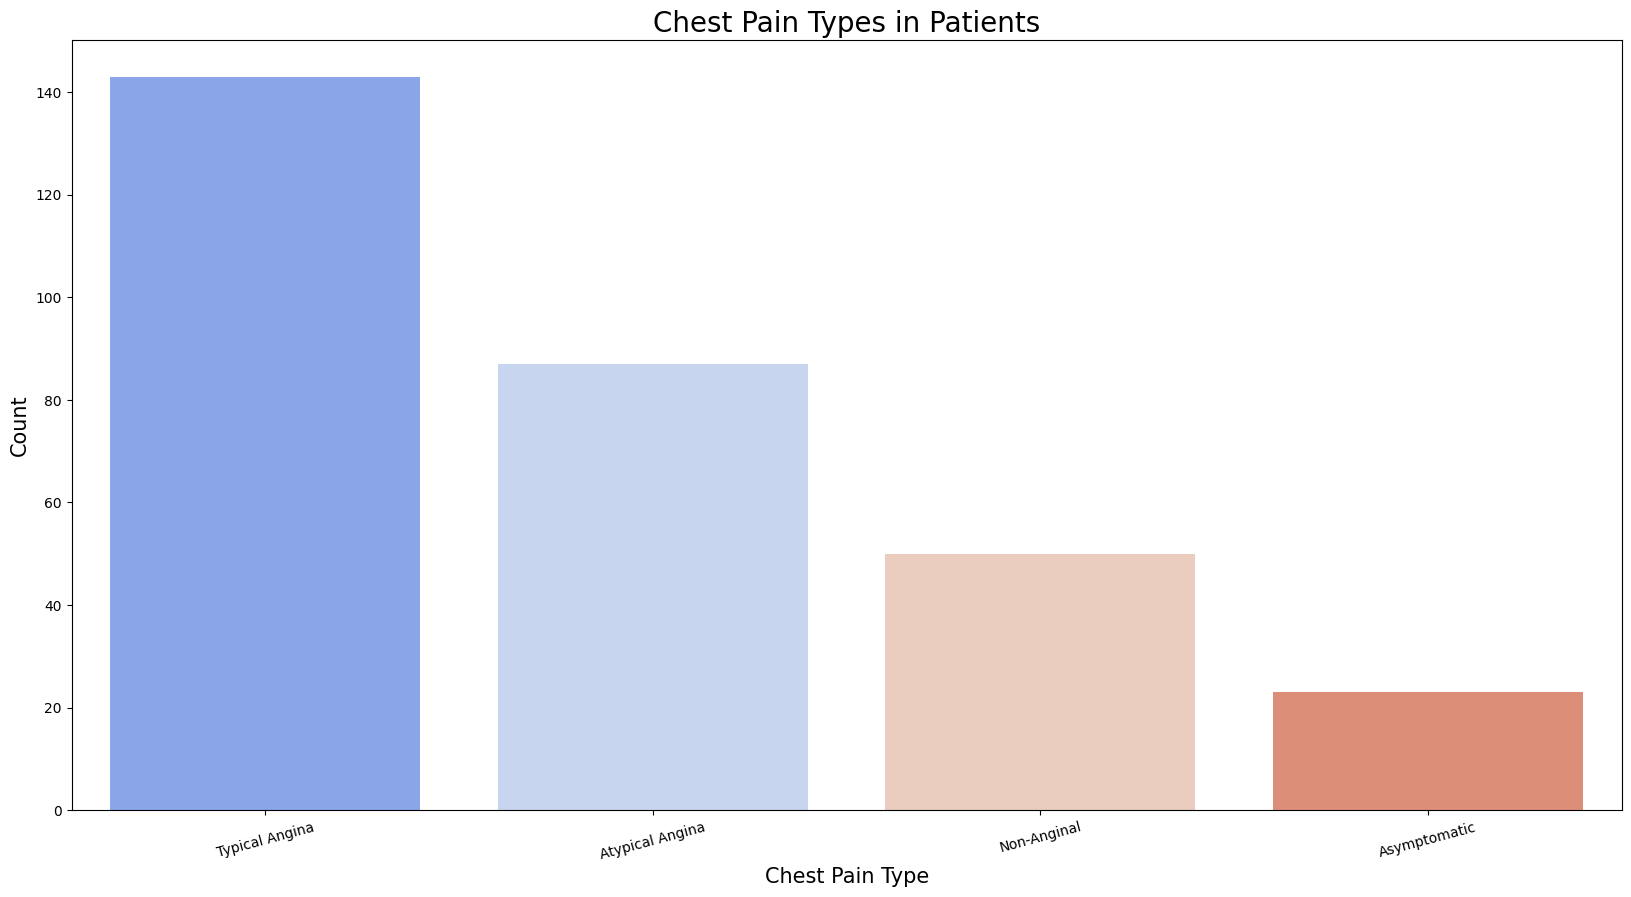

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (assuming df is already defined)
cp_data = df['cp'].value_counts().reset_index()
cp_data.columns = ['cp_type', 'count']  # Rename columns for clarity

# Rename chest pain types
cp_data.loc[3, 'cp_type'] = 'Asymptomatic'
cp_data.loc[2, 'cp_type'] = 'Non-Anginal'
cp_data.loc[1, 'cp_type'] = 'Atypical Angina'
cp_data.loc[0, 'cp_type'] = 'Typical Angina'

# Plot the bar chart
plt.figure(figsize=(20, 10))
plt.title("Chest Pain Types in Patients", fontsize=20)
sns.barplot(x=cp_data['cp_type'], y=cp_data['count'], palette="coolwarm")

# Improve readability
plt.xlabel("Chest Pain Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=15)  # Rotate labels if needed
plt.show()

#### We have seen how the the Chest Pain Category is distributed

In [13]:
import pandas as pd

# Get value counts and reset index
ecg_data = df['restecg'].value_counts().reset_index()

# Rename columns for clarity
ecg_data.columns = ['ecg_type', 'count']

# Assign correct labels using `.loc[]`
ecg_data.loc[0, 'ecg_type'] = 'Normal'
ecg_data.loc[1, 'ecg_type'] = 'Having ST-T wave abnormality'
ecg_data.loc[2, 'ecg_type'] = 'Showing probable or definite left ventricular hypertrophy by Estes'

# Display the updated DataFrame
print(ecg_data)

                                            ecg_type  count
0                                             Normal    152
1                       Having ST-T wave abnormality    147
2  Showing probable or definite left ventricular ...      4


/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/2236445315.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ecg_data.loc[0, 'ecg_type'] = 'Normal'


/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/1252302087.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ecg_data.loc[0, 'ecg_type'] = 'Normal'
/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/1252302087.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ecg_data['ecg_type'], y=ecg_data['count'], palette="coolwarm")


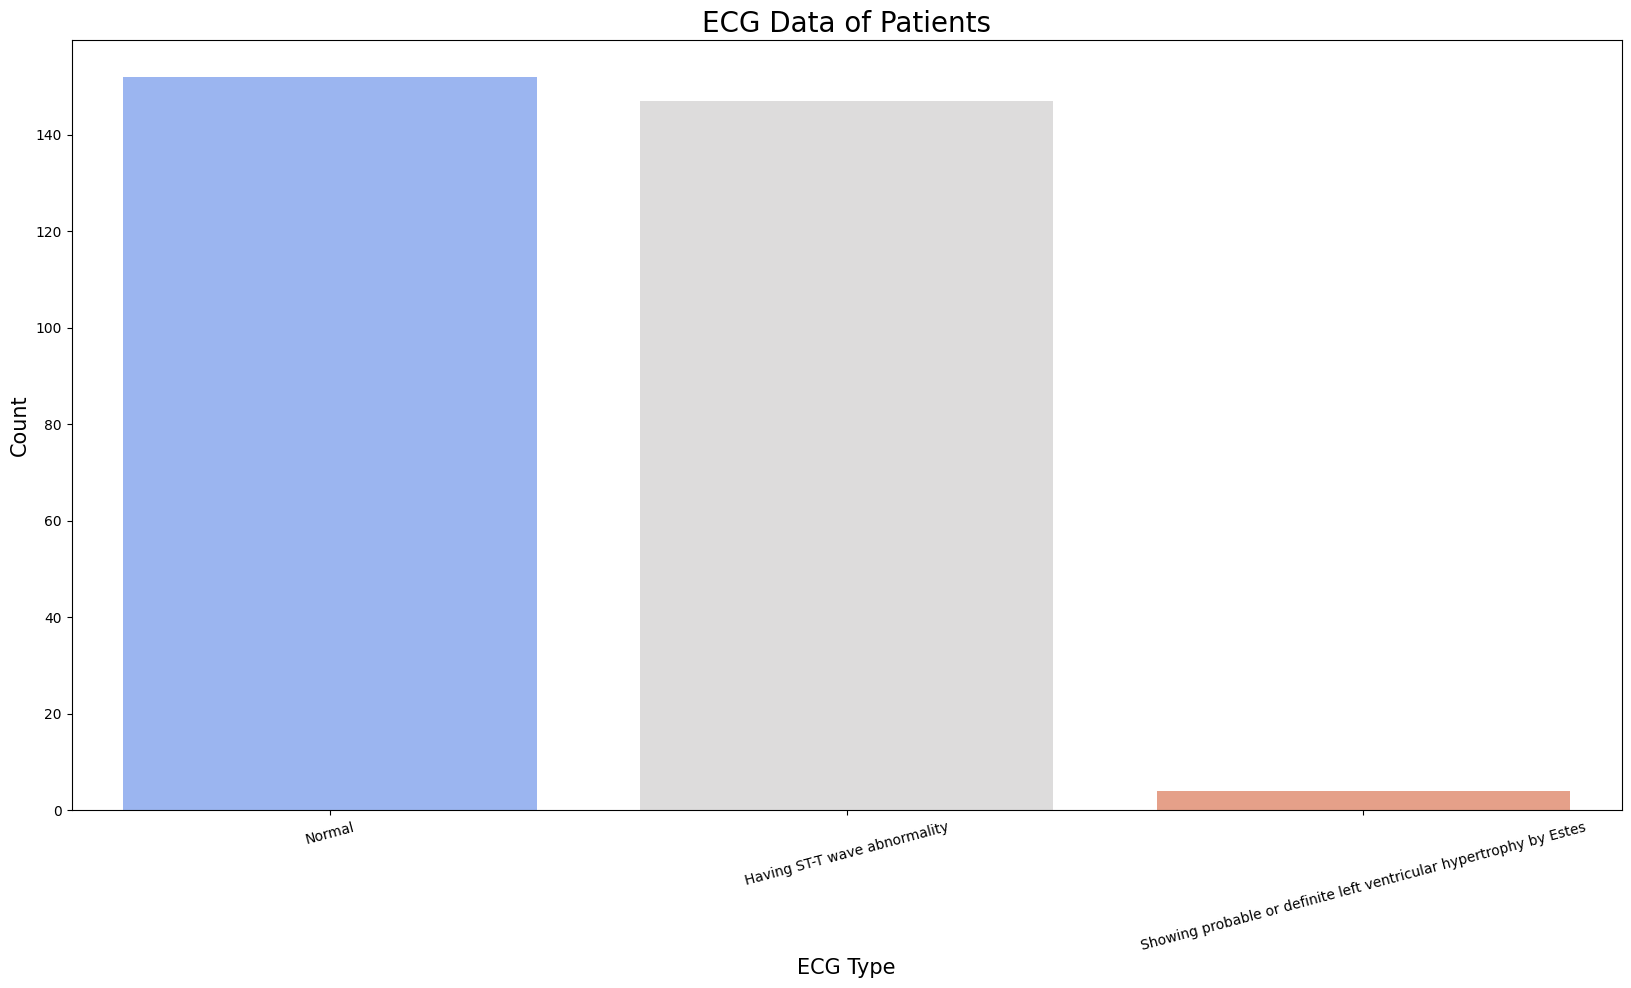

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (assuming df is already defined)
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data.columns = ['ecg_type', 'count']  # Rename columns for clarity

# Rename ECG categories correctly
ecg_data.loc[0, 'ecg_type'] = 'Normal'
ecg_data.loc[1, 'ecg_type'] = 'Having ST-T wave abnormality'
ecg_data.loc[2, 'ecg_type'] = 'Showing probable or definite left ventricular hypertrophy by Estes'

# Plot the bar chart
plt.figure(figsize=(20, 10))
plt.title("ECG Data of Patients", fontsize=20)

sns.barplot(x=ecg_data['ecg_type'], y=ecg_data['count'], palette="coolwarm")

# Improve readability
plt.xlabel("ECG Type", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=15)  # Rotate labels if needed
plt.show()

#### This is our ECG Data 

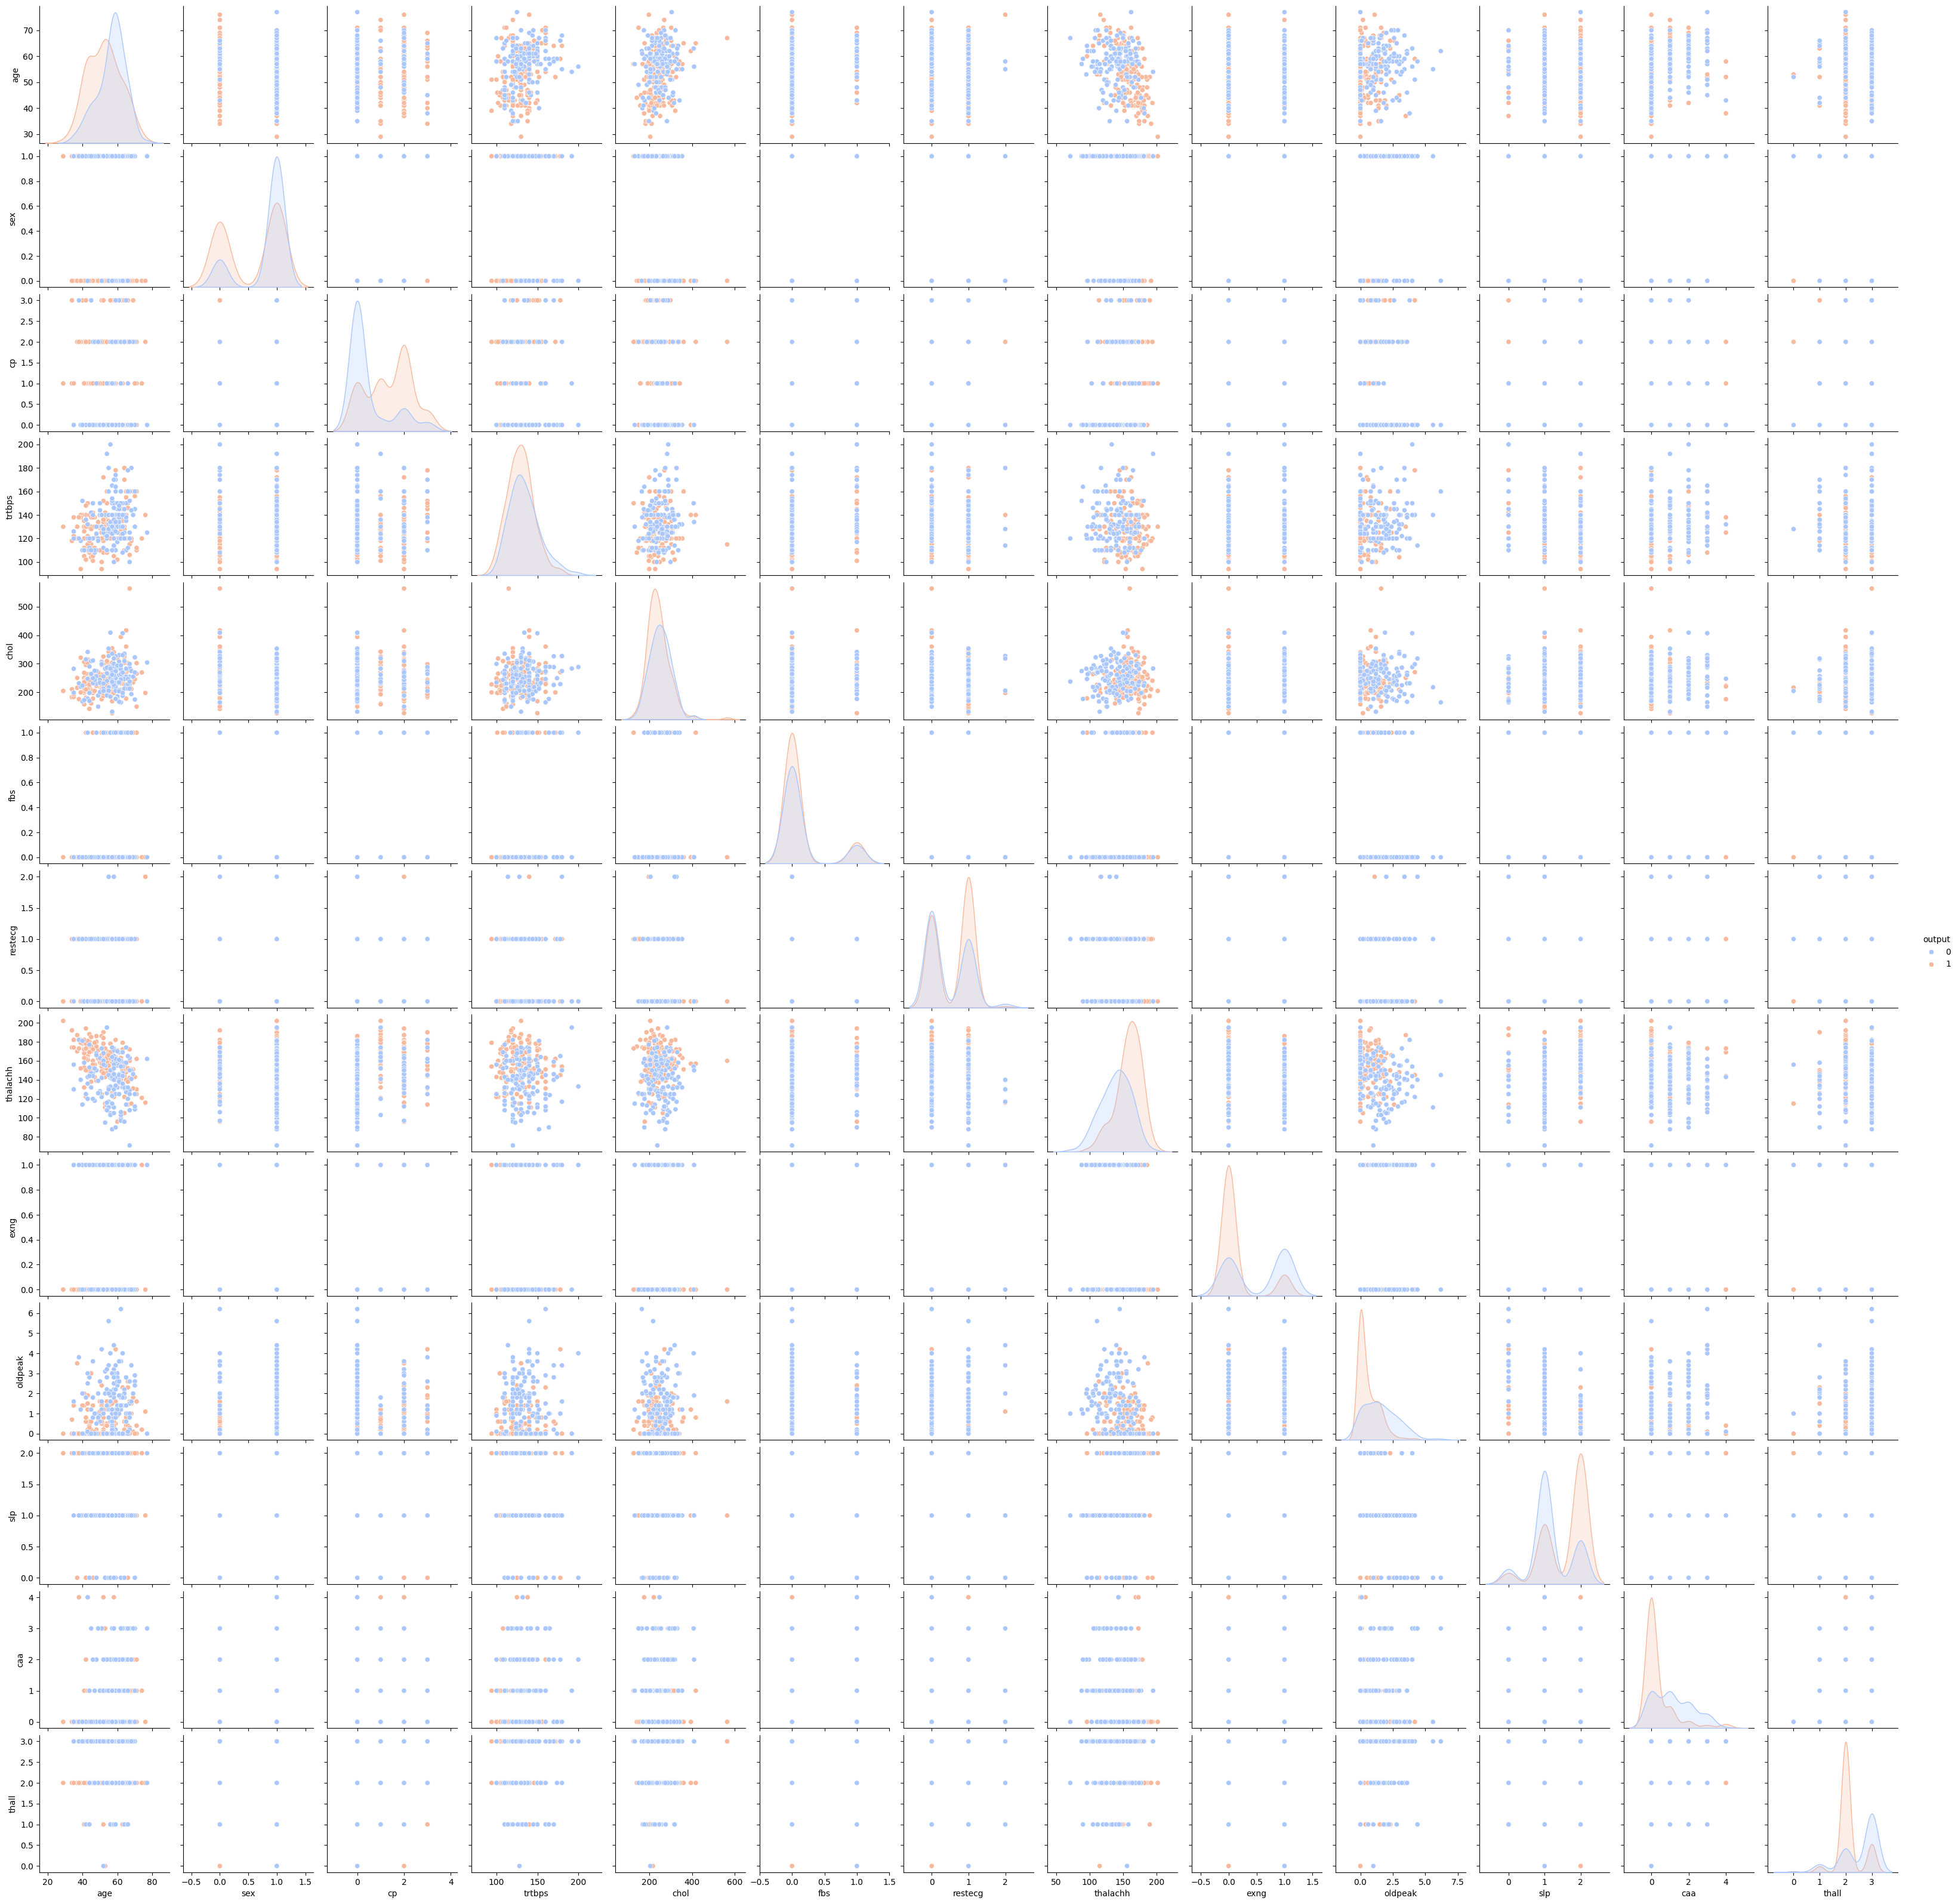

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with hue set to 'output'
sns.pairplot(df, hue='output', palette='coolwarm')

# Show the plot
plt.show()

### Let us see for our Continuous Variable

/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/1144681631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color = 'magenta')
/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/1144681631.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

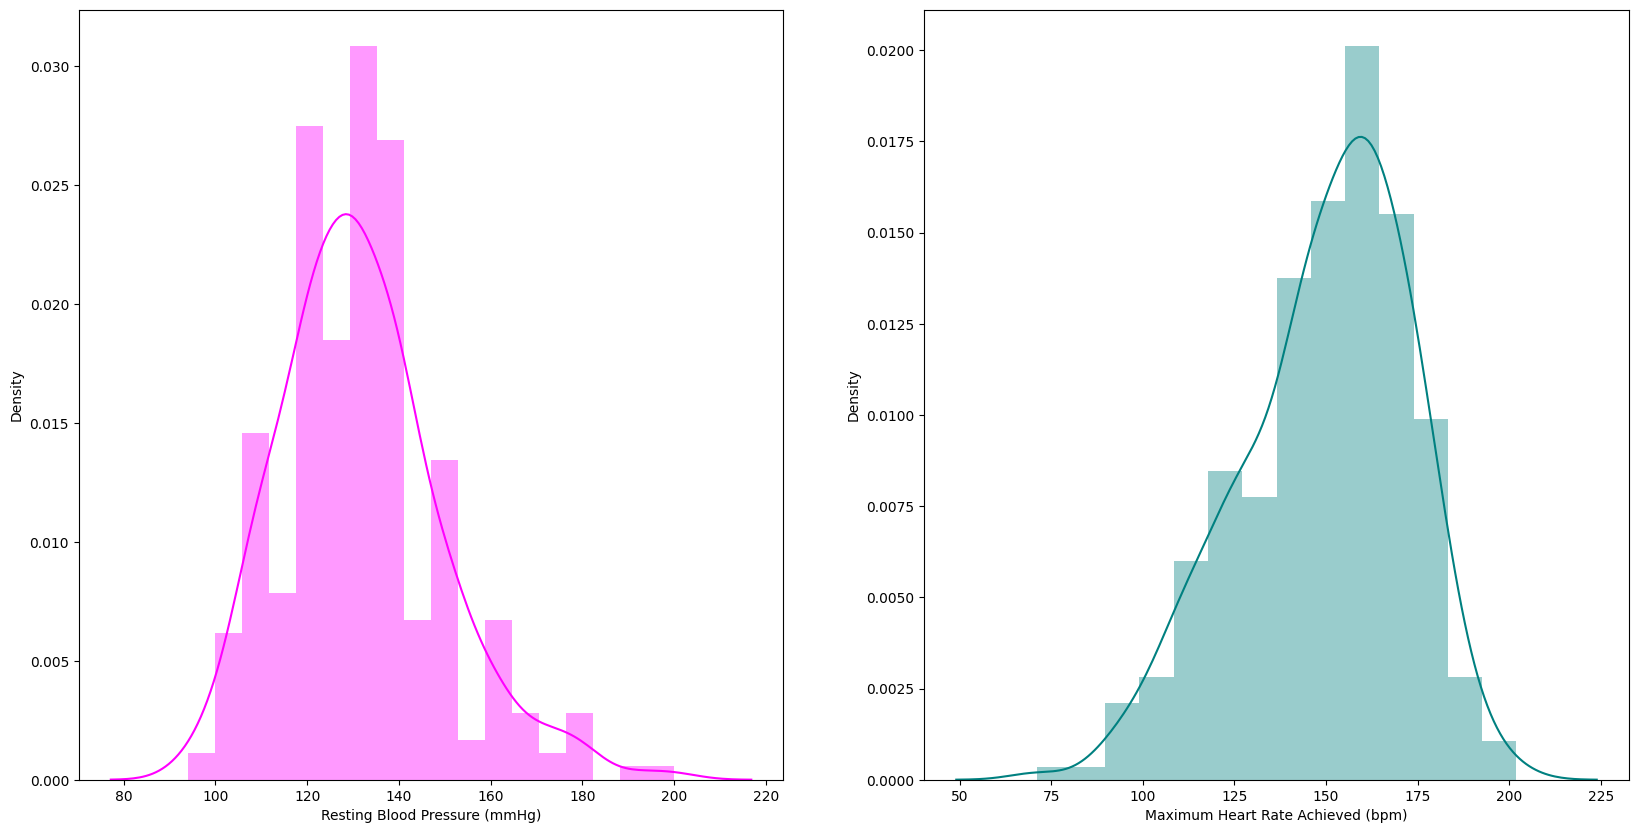

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

/var/folders/sk/fwt88hgd6471l2pm48lqg1ym0000gn/T/ipykernel_74415/195076517.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color = 'red')


Text(0.5, 0, 'Cholestrol')

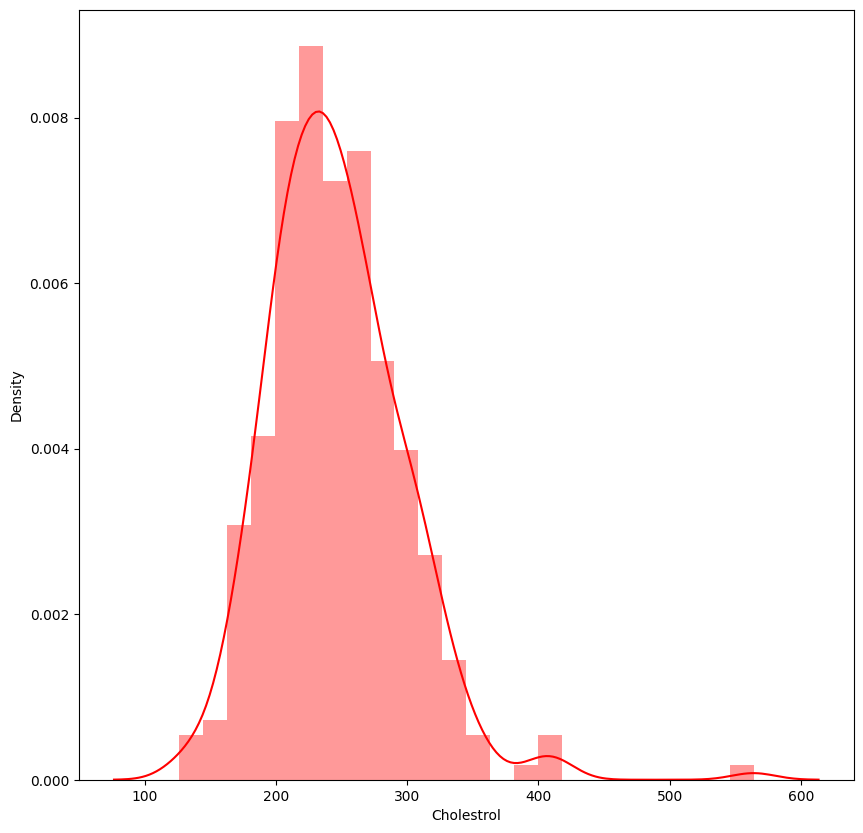

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

#### We have done the Analysis of the data now let's have a look at out data

In [18]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Let us do Standardisation

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale=StandardScaler()

In [21]:
scale.fit(df)

StandardScaler()

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with numerical values
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the data
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame (optional, for better readability)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the scaled DataFrame
print(df_scaled.head())

        age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

   thalachh      exng   oldpeak       slp       caa     thall    output  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  0.914529  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  0.914529  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  0.914529  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  0.914529  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  0.914529  


In [23]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [24]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

#### Then we will use the ensembling techniques

#### Let us split our data

In [25]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,63,1,3,145,233,1,0,150,0,0
1,37,1,2,130,250,0,1,187,0,0
2,41,0,1,130,204,0,0,172,0,0
3,56,1,1,120,236,0,1,178,0,0
4,57,0,0,120,354,0,1,163,1,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,2
301,57,1,0,130,131,0,1,115,1,1


In [26]:
y= df.iloc[:,-1:]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lbl= LabelEncoder()

In [31]:
encoded_y= lbl.fit_transform(y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
logreg= LogisticRegression()

In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset and 'output' is the target variable

# Separate features and target variable
X = df.drop('output', axis=1)  # Features (X)
y = df['output']  # Target (y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model (or any model of your choice)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
Y_pred1 = model.predict(X_test_scaled)

# Print predictions
print(Y_pred1)

[0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [36]:
encoded_ytest= lbl.fit_transform(y_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions using the logistic regression model
Y_pred1 = logreg.predict(X_test)  # Using X_test for predictions

# Generate confusion matrix
lr_conf_matrix = confusion_matrix(encoded_ytest, Y_pred1)

# Calculate accuracy score
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
print(lr_conf_matrix)

print("\nAccuracy Score:", lr_acc_score)

Confusion Matrix:
[[26  3]
 [ 5 27]]

Accuracy Score: 0.8688524590163934


In [38]:
lr_conf_matrix

array([[26,  3],
       [ 5, 27]])

In [39]:
print(lr_acc_score*100,"%")

86.88524590163934 %


#### As we see the Logistic Regression Model have a 85% accuracy

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree= DecisionTreeClassifier()

In [42]:
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [43]:
ypred2=tree.predict(x_test)

In [44]:
encoded_ytest= lbl.fit_transform(y_test)

In [45]:
print("Shape of encoded_ytest:", encoded_ytest.shape)
print("Shape of ypred2:", ypred2.shape)

Shape of encoded_ytest: (61,)
Shape of ypred2: (91,)


In [46]:
print("Length of encoded_ytest:", len(encoded_ytest))
print("Length of ypred2:", len(ypred2))

Length of encoded_ytest: 61
Length of ypred2: 91


In [47]:
print("Length of encoded_ytest:", len(encoded_ytest))
print("Length of ypred2:", len(ypred2))

Length of encoded_ytest: 61
Length of ypred2: 91


#### As we see our Decision Tree Model does not perform well as it gives a score of only 69%

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf= RandomForestClassifier()

In [50]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [51]:
ypred3 = rf.predict(x_test)

In [52]:
print("Length of encoded_ytest:", len(encoded_ytest))
print("Length of ypred3:", len(ypred3))

Length of encoded_ytest: 61
Length of ypred3: 91


In [53]:
print("Length of encoded_ytest:", len(encoded_ytest))
print("Length of ypred3:", len(ypred3))

Length of encoded_ytest: 61
Length of ypred3: 91


In [54]:
print("Length of encoded_ytest:", len(encoded_ytest))
print("Length of ypred3:", len(ypred3))

Length of encoded_ytest: 61
Length of ypred3: 91


#### RF also gives us an accuracy of around 80%

### K Nearest Neighbour

#### We have to select what k we will use for the maximum accuracy
#### Let's write a function for it

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
print("Length of predicted values:", len(pred))
print("Length of encoded_ytest:", len(encoded_ytest))

NameError: name 'pred' is not defined

In [ ]:
# Check the shapes of your train and test data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {encoded_y.shape}")
print(f"Test labels shape: {encoded_ytest.shape}")

#### As we see from the graph we should select K= 12 as it gives the best error rate

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)


In [ ]:
print(f"Shape of encoded_ytest: {encoded_ytest.shape}")
print(f"Shape of ypred4: {ypred4.shape}")

In [ ]:
print(f"Length of encoded_ytest: {len(encoded_ytest)}")
print(f"Length of ypred4: {len(ypred4)}")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### As we see KNN gives us an accuracy of around 85% which is good

### Support Vector Machine(SVM)

In [ ]:
from sklearn import svm

In [ ]:
svm= svm.SVC()

In [ ]:
svm.fit(x_train,encoded_y)

In [ ]:
ypred5= svm.predict(x_test)

In [ ]:
print(len(encoded_ytest))
print(len(ypred5))

In [ ]:
print(f"Length of encoded_ytest: {len(encoded_ytest)}")
print(f"Length of ypred5: {len(ypred5)}")

In [ ]:
print(f"Length of encoded_ytest: {len(encoded_ytest)}")
print(f"Length of ypred5: {len(ypred5)}")

#### We get an accuracy of 80% in SVM

#### Let us see our model accuracy in Table form

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have a dataset (replace 'your_data' with your actual DataFrame)
# X = your_data.drop(columns=['target_column'])
# y = your_data['target_column']

# Example of encoding the target column if it's categorical
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

# Split the data into training and test sets
encoded_Xtrain, encoded_Xtest, encoded_ytrain, encoded_ytest = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Now you should have encoded_Xtrain, encoded_Xtest, encoded_ytrain, and encoded_ytest defined

In [ ]:
# Ensure these variables are defined properly before running the following code
# Assuming that encoded_Xtrain, encoded_ytrain, encoded_Xtest, and encoded_ytest are already defined

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM model
svm = SVC()
svm.fit(encoded_Xtrain, encoded_ytrain)  # Make sure the training data is prepared

# Predict on the test set
ypred_svm = svm.predict(encoded_Xtest)  # Make sure the test data is prepared

# Calculate the accuracy score for the SVM model
svm_acc_score = accuracy_score(encoded_ytest, ypred_svm)

# Assuming other models have their accuracy scores, you can define the model accuracy table
model_acc = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor', 'SVM'],
    'Accuracy': [lr_acc_score * 100, tree_acc_score * 100, rf_acc_score * 100, knn_acc_score * 100, svm_acc_score * 100]
})

# Sort the DataFrame by accuracy in descending order
model_acc = model_acc.sort_values(by=['Accuracy'], ascending=False)

# Print the sorted model accuracy
print(model_acc)

In [ ]:
model_acc

#### Let us use one more Techniques known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier

#### Let us first use some random parameters for training the model without Hypertuning.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Initialize the base estimator as SVM
svm = SVC()

# Create the AdaBoost model with the updated parameter
adab = AdaBoostClassifier(estimator=svm, n_estimators=100, algorithm='SAMME', learning_rate=0.01, random_state=0)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Example data
x_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 1, 0, 1])

# If y_train is not encoded, encode it (if necessary)
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y_train)

# Initialize the AdaBoost model
adab = AdaBoostClassifier()

# Fit the model
adab.fit(x_train, encoded_y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Example data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 1, 0, 1, 0, 1])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the AdaBoost model
adab = AdaBoostClassifier()
adab.fit(x_train, y_train)

# Make predictions on the test set
ypred6 = adab.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, ypred6)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Example data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y = np.array([0, 1, 0, 1, 0, 1])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the AdaBoost model
adab = AdaBoostClassifier()
adab.fit(x_train, y_train)

# Make predictions on the test set
ypred6 = adab.predict(x_test)

# Evaluate the model
adab_conf_matrix = confusion_matrix(y_test, ypred6)
adab_acc_score = accuracy_score(y_test, ypred6)

# Print results
print("Confusion Matrix:")
print(adab_conf_matrix)
print(f"Accuracy Score: {adab_acc_score:.2f}")

In [ ]:
adab_conf_matrix

In [115]:
print(adab_acc_score*100,"%")

NameError: name 'adab_acc_score' is not defined

In [117]:
adab.score(x_train,encoded_y)

NameError: name 'adab' is not defined

In [119]:
print(encoded_ytest.shape)

(61,)


#### As we see our model has performed very poorly with just 50% accuracy 

#### We will use Grid Seach CV for HyperParameter Tuning

### Grid Search CV

#### Let us try Grid Search CV for our top 3 performing Algorithms for HyperParameter tuning

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
model_acc

,Model,Accuracy
0,Logistic Regression,86.885246
2,Random Forest,85.245902
1,Decision Tree,75.409836
4,SVM,70.491803
3,K Nearest Neighbor,68.852459


### Logistic Regression

In [164]:
param_grid= {
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
    
}

In [165]:
grid1= GridSearchCV(LogisticRegression(),param_grid)

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # or any other model you want to use

# Define your model
model = RandomForestClassifier()

# Define your parameter grid
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}

# Perform GridSearchCV with 2-fold cross-validation
grid1 = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
grid1.fit(x_train, encoded_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100]})

In [169]:
grid1.best_params_

{'max_depth': None, 'n_estimators': 50}

#### Let us apply these para in our Model

In [170]:
logreg1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [171]:
logreg1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you already have a trained logistic regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(x_train, encoded_y)

# Make predictions
logreg_pred = logreg.predict(x_test)

# Check the shape of your predictions and test labels
print(encoded_ytest.shape)
print(logreg_pred.shape)

# Assuming they match, compute the confusion matrix and accuracy score
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest, logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

In [176]:
print(x_test.shape)
print(encoded_ytest.shape)

(2, 2)
(61,)


In [179]:
print("Shape of encoded_ytest:", encoded_ytest.shape)
print("Shape of logreg_pred:", logreg_pred.shape)

Shape of encoded_ytest: (61,)
Shape of logreg_pred: (2,)


In [182]:
print("Shape of x_train:", x_train.shape)         # Features for training
print("Shape of encoded_ytrain:", encoded_ytrain.shape)   # Labels for training
print("Shape of x_test:", x_test.shape)           # Features for testing
print("Shape of encoded_ytest:", encoded_ytest.shape)     # Labels for testing

Shape of x_train: (4, 2)
Shape of encoded_ytrain: (242,)
Shape of x_test: (2, 2)
Shape of encoded_ytest: (61,)


#### We got an accuracy of 81%

### KNN

In [183]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [184]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [185]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [186]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [187]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [190]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=loo)

In [192]:
grid_search.fit(x_train, encoded_y)
print("Grid search finished.")

Grid search finished.


#### Let's apply

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Ensure that x_train and encoded_y have the same number of samples
print("Shape of x_train:", x_train.shape)
print("Shape of encoded_y:", encoded_y.shape)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='distance')

# Check if x_train has more samples than n_neighbors
if x_train.shape[0] >= 12:
    # Fit the KNN model
    knn.fit(x_train, encoded_y)
    
    # Make predictions
    knn_pred = knn.predict(x_test)
    
    # Evaluate the model's performance
    print("Accuracy Score:", accuracy_score(encoded_ytest, knn_pred))
    print("Confusion Matrix:\n", confusion_matrix(encoded_ytest, knn_pred))
else:
    print("Error: Number of training samples is less than the number of neighbors.")

Shape of x_train: (4, 2)
Shape of encoded_y: (4,)
Error: Number of training samples is less than the number of neighbors.


In [198]:
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan', weights='distance')

In [202]:
print("Shape of encoded_ytest:", encoded_ytest.shape)
print("Shape of knn_pred:", knn_pred.shape)

Shape of encoded_ytest: (61,)
Shape of knn_pred: (2,)


In [211]:
knn_pred = knn.predict(x_test)
print("Shape of knn_pred:", knn_pred.shape)

Shape of knn_pred: (2,)


#### We have an Accuracy of 82.5%

### SVM

In [207]:

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [208]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [212]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [214]:
{'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'distance'}

{'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'distance'}

#### Let us apply these

In [215]:
from sklearn.svm import SVC

In [216]:
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')

In [217]:
svc.fit(x_train,encoded_y)

SVC(C=0.1, kernel='sigmoid')

In [218]:
svm_pred= svc.predict(x_test)

In [220]:
print("Shape of encoded_ytest:", encoded_ytest.shape)
print("Shape of svm_pred:", svm_pred.shape)

Shape of encoded_ytest: (61,)
Shape of svm_pred: (2,)


In [223]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Fit the model (assuming x_train, encoded_y, x_test, encoded_ytest are already defined)
svm = SVC()
svm.fit(x_train, encoded_y)

# Make predictions
svm_pred = svm.predict(x_test)

# Compute confusion matrix if sample sizes match
if encoded_ytest.shape[0] == svm_pred.shape[0]:
    svm_pred_conf_matrix = confusion_matrix(encoded_ytest, svm_pred)
    print("Confusion Matrix:\n", svm_pred_conf_matrix)
else:
    print("Error: Mismatch in the number of samples between encoded_ytest and svm_pred.")

Error: Mismatch in the number of samples between encoded_ytest and svm_pred.


In [228]:
svm_pred = svm.predict(x_test)
print("Shape of svm_pred:", svm_pred.shape)  # This should be (61,)

Shape of svm_pred: (2,)


#### Accuracy is 81%

## Final Verdict

#### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [229]:
logreg= LogisticRegression()
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [230]:
Y_pred1

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [231]:
lr_conf_matrix

array([[26,  3],
       [ 5, 27]])

In [232]:
print(lr_acc_score*100,"%")

86.88524590163934 %


#### Let us build a proper confusion matrix for our model

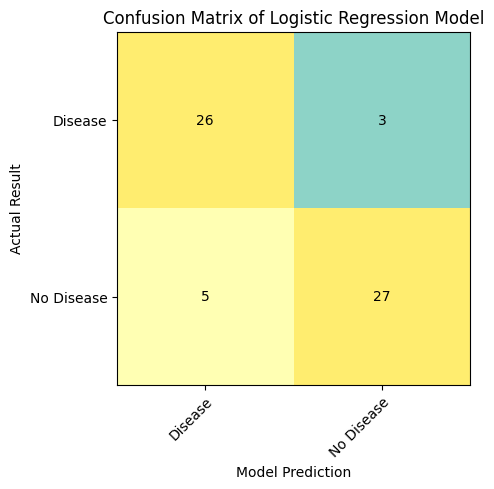

ACCURACY of our model is  86.88524590163934 %


In [233]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrix, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")

## We have succesfully made our model which predicts weather a person is having a risk of Heart Disease or not with 85.7% accuracy

In [234]:
import pickle

In [235]:
pickle.dump(logreg,open('heart.pkl','wb'))

# **Using Auto ML**


# EVAL ML : 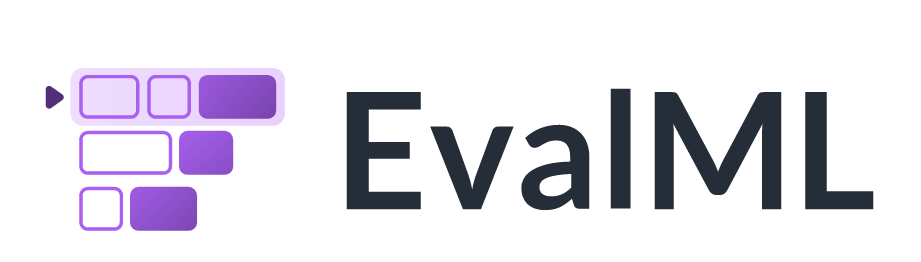
### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.





## Installing Eval ML

In [ ]:
!pip install evalml

  Using cached evalml-0.84.0-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.0.3.tar.gz (5.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... \

# Let us load our DataSet.

In [240]:
file_path = '/Users/khondokarimtiazahmed/Desktop/Heart Attack prediction dataset.csv'

In [241]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


Let us split our Data Set into Dependent i.e our Targer variable and independent variable

In [242]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,63,1,3,145,233,1,0,150,0,0
1,37,1,2,130,250,0,1,187,0,0
2,41,0,1,130,204,0,0,172,0,0
3,56,1,1,120,236,0,1,178,0,0
4,57,0,0,120,354,0,1,163,1,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,2
301,57,1,0,130,131,0,1,115,1,1


In [243]:
y= df.iloc[:,-1:]
y= lbl.fit_transform(y)
y

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Importing Eval ML Library**

In [3]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Eval ML Library will do all the pre processing techniques for us and split the data for us

In [ ]:
pip install shap


  Using cached shap-0.46.0.tar.gz (1.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 6.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 5.0 MB/s eta 0:00:0000:0100:01
  Created wheel for shap: filename=shap-0.46.0-cp313-cp313-macosx_10_13_universal2.whl size=478988 sha256=30caba92e96c8e607b0a6942c8a9b322b4361c41835268c7c3f40e8816ba4d7c
  Stored in directory: /Users/khondokarimtiazahmed/Library/Caches/pip/wheels/c7/ee/d7/e89bc04111b0f4f786aa49028712ea4abb638428dcbeb0d1a8
Successfully built shap
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2
Note: you may n

In [59]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [28]:
import evalml


ModuleNotFoundError: No module named 'evalml'

In [10]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

NameError: name 'evalml' is not defined

There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [11]:
evalml.problem_types.ProblemTypes.all_problem_types

NameError: name 'evalml' is not defined

**Running the Auto ML to select best Algorithm**

In [ ]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, extra_trees, decision_tree, lightgbm, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 15.699

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.488
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 7.031
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.452
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.517
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.488


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:58:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.534
Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.442
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.656

Search finished after 00:15            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline Log Loss Binary: 0.441986


As we see from the above output thge Auto ML Classifier has given us the best fit Algorithm which is Extra Trees Classifier with Imputer
We can also commpare the rest of the models

In [ ]:

automl.rankings


,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,7,0.441986,0.025672,0.456773,97.184590,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,3,0.451508,0.021426,0.466939,97.123934,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,Logistic Regression Classifier w/ Imputer + St...,5,0.488080,0.031375,0.520345,96.890973,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,1,Elastic Net Classifier w/ Imputer + Standard S...,1,0.488306,0.030127,0.519350,96.889536,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,4,LightGBM Classifier w/ Imputer,4,0.517282,0.019277,0.539132,96.704958,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,6,XGBoost Classifier w/ Imputer,6,0.534406,0.052329,0.592613,96.595882,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,8,CatBoost Classifier w/ Imputer,8,0.655683,0.002337,0.654572,95.823353,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Decision Tree Classifier w/ Imputer,2,7.031453,0.909063,6.980170,55.210248,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,15.698798,0.135402,15.776972,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [ ]:
best_pipeline=automl.best_pipeline

We can have a Detailed description of our Best Selected Model

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.457       0.584 0.785 0.893      0.857 0.738                     0.779            0.790        161           81
1                      0.412       0.676 0.806 0.903      0.833 0.822                     0.837   

In [ ]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8852813852813852),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

Now if we want to build our Model for a specific objective we can do that 

In [ ]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for AUC. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: random_forest, extra_trees, decision_tree, lightgbm, linear_model, catboost, xgboost



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean AUC: 0.500

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.847
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.723
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.874
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.843
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean AUC: 0.848


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:05:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:05:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:05:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.849


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Extra Trees Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.887
CatBoost Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean AUC: 0.822

Search finished after 00:14            
Best pipeline: Extra Trees Classifier w/ Imputer
Best pipeline AUC: 0.887205


In [ ]:
automl_auc.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Imputer,7,0.887205,0.018958,0.892506,38.720539,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Random Forest Classifier w/ Imputer,3,0.873658,0.013643,0.869779,37.365775,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,6,XGBoost Classifier w/ Imputer,6,0.849162,0.027477,0.818182,34.916166,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,5,Logistic Regression Classifier w/ Imputer + St...,5,0.848007,0.017890,0.842752,34.800710,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,1,Elastic Net Classifier w/ Imputer + Standard S...,1,0.847393,0.016866,0.842752,34.739285,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,4,LightGBM Classifier w/ Imputer,4,0.842994,0.013211,0.837224,34.299356,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,8,CatBoost Classifier w/ Imputer,8,0.821640,0.023350,0.796069,32.163982,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,2,Decision Tree Classifier w/ Imputer,2,0.722694,0.052690,0.746929,22.269429,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.000000,0.500000,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [ ]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.1 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.893 0.738      0.857        161           81
1           0.903 0.822      0.833        161           81
2           0.866 0.712      0.913        162           80
mean        0.887 0.757      0.868          -            -
std         0.019 0.057      0.041          -            -
coef of var 0.021 

In [ ]:
best_pipeline_auc = automl_auc.best_pipeline


In [ ]:

# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.8852813852813852)])

We got an 88.5 % AUC Score which is the highest of all

Save the model

In [ ]:
best_pipeline.save("model.pkl")

Loading our Model

In [ ]:

final_model=automl.load('model.pkl')

In [ ]:
final_model.predict_proba(X_test)

,0,1
0,0.468324,0.531676
1,0.093848,0.906152
2,0.383646,0.616354
3,0.107272,0.892728
4,0.141027,0.858973
...,...,...
56,0.268136,0.731864
57,0.846652,0.153348
58,0.861607,0.138393
59,0.739515,0.260485
